## Описание данных

Имеются следующие данные:

* date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
* name – имя пользователя
* transaction – статус транзакции
* minute – сколько минут прошло с начала дня

### Задание 1

Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику

Cколько в датасете пропущенных значений?

In [1]:
import pandas as pd

df = pd.read_csv('transaction_data.csv')
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


Ответ: 0

### Задание 2

Проверьте, какие значения принимает колонка transaction. Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота

Расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df['transaction'].unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [3]:
df['transaction'].value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

<AxesSubplot:>

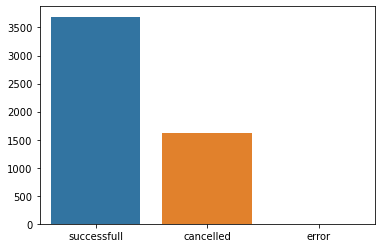

In [4]:
sns.barplot(x=df['transaction'].value_counts().index,\
            y=df['transaction'].value_counts().values)

Ответ: successfull, cancelled, error

### Задание 3

Подумайте, хорош ли полученный график?

Улучшите график

[Text(0, 0, '3692'), Text(0, 0, '1619'), Text(0, 0, '4')]

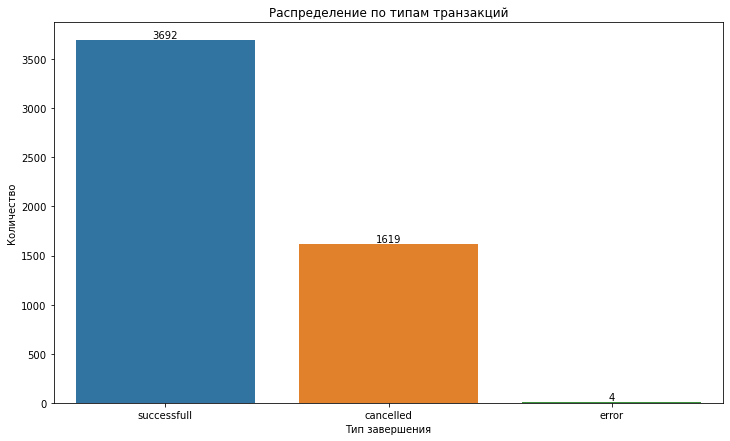

In [5]:
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(x=df['transaction'].value_counts().index,\
            y=df['transaction'].value_counts().values,\
            ax=ax)
ax.set_ylabel('Количество')
ax.set_xlabel('Тип завершения')
ax.set_title('Распределение по типам транзакций')
ax.bar_label(ax.containers[0])

### Задание 4

Сколько произошло ошибок?

In [6]:
print(f"Ответ: {df['transaction'].value_counts()['error']}")

Ответ: 4


### Задание 5

Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

* по оси x – число транзакций
* по оси y – доля пользователей с таким числом транзакций

Выберите верные утверждения.

* Пользователи в среднем совершили примерно по 66 транзакций
* Максимальное число транзакций – 82
* Пользователи в среднем совершили по 64 транзакции
* Примерно 25% пользователей совершили менее 61 транзакции
* Примерно 25% пользователей совершили более 61 транзакции
* Пользователи в среднем совершили примерно по 56 транзакций
* Максимальное число транзакций – 112
* Пользователи в среднем совершили примерно по 94 транзакции

In [7]:
success_user = df.loc[df['transaction'] == 'successfull'].groupby('name', as_index=False).size()
success_user.head()

,name,size
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


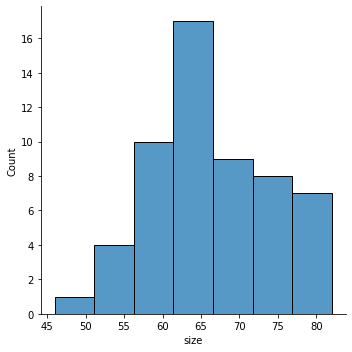

In [8]:
sns.displot(data=success_user,\
            x='size')

In [9]:
success_user.describe()

,size
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


* Пользователи в среднем совершили примерно по 66 транзакций
* Максимальное число транзакций – 82
* Примерно 25% пользователей совершили менее 61 транзакции

### Задание 6

К вам пришёл коллега с немного обновленными данными (transaction_data_updated.csv). Постройте сводную таблицу, где:

* столбцы – имена пользователей
* строки – минута времени осуществления операции (minute)
* значения – число совершённых операций

*Пропущенные значения заполните нулями, фильтровать успешные транзакции не нужно - постройте табличку по всем*

In [10]:
new_df = pd.read_csv('transaction_data_updated.csv')
new_df.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [11]:
new_df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [12]:
new_df = pd.read_csv('transaction_data_updated.csv',\
                    parse_dates=['date'])
new_df.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [13]:
minute = new_df.groupby(['name', 'minute'], as_index=False).size()
minute.head()

,name,minute,size
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [14]:
pivot_minute = minute.pivot(index='minute', columns='name', values='size')
pivot_minute.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


In [15]:
pivot_minute = pivot_minute.fillna(0)
pivot_minute.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [16]:
minute_trans = pivot_minute.sum(axis=1)
minute_trans.head()

minute
0    111.0
1    145.0
2    123.0
3    129.0
4     92.0
dtype: float64

### Задание 7

Исправьте ошибку коллеги (если она есть), и посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute

*Например:*

date    |     name    |    transaction|  minute|  true_minute
--------|------------|----------------|--------|-------------
2020-03-02 00:37:20 |Ekaterina_Petrova | cancelled  |  37    |  37
2020-03-02 01:06:14| Ekaterina_Smirnova |successfull | 6    |   66

In [17]:
new_df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [18]:
new_df['true_minute'] = new_df['date'].dt.minute + new_df['date'].dt.hour * 60
new_df.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
